# Redes Neurais e Aprendizado Profundo - ECOM178 - M

## Perceptron, db e db1

Curso: **Engenharia de Computação**

**Prof. Dr. Tiago Vieira**

Aluno: 

**John Davi Dutra Canuto Pires - 18112206**

# Perceptron

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [ ]:
# Função de ativação linear
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

# Cálculo da multiplicação das matrizes de input com os pesos e soma com viés
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# Retropropagação para atualização de pesos
def perceptronStep(X, y, W, b, learning_rate = 0.01):
    for index in range(len(X)):
        y_hat = prediction(X[index], W, b)
        if y_hat - y[index] == 1:
            W[0] -= X[index][0] * learning_rate
            W[1] -= X[index][1] * learning_rate
            b -= learning_rate
        elif y_hat - y[index] == -1:
            W[0] += X[index][0] * learning_rate
            W[1] += X[index][1] * learning_rate
            b += learning_rate
    
    return W, b

In [ ]:
# Plot das linhas
def plot_line(ax, slope, intercept, *args, **kwargs):
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + (slope * x_vals)
    ax.plot(x_vals, y_vals , *args, **kwargs)

# Função principal
def trainPerceptronAlgorithm(X, y, W_num = 2, learning_rate = 0.01, num_epochs = 25, scale = 0.5):
    x_min, x_max = min(X.T[0]) - scale, max(X.T[0]) + scale
    y_min, y_max = min(X.T[1]) - scale, max(X.T[1]) + scale
    W = np.array(np.random.rand(W_num,1))
    b = np.random.rand(1)[0] + x_max
    
    plt.figure(figsize=(14, 10))
    plt.scatter(X[:,0], X[:,1], c=[3 if x==0 else 1 for x in y])
    ax = plt.gca()
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
    boundary_lines = []
    for i in tqdm.tqdm(range(num_epochs)):
        
        W, b = perceptronStep(X, y, W, b, learning_rate)
        
        if i%2 == 0: # to reduce clutter on plot
            plot_line(ax, -W[0]/W[1], -b/W[1], *['--g'], **{'linewidth': 0.5} )
        
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    
    plot_line(ax, boundary_lines[-1][0], boundary_lines[-1][1], *['r'], **{'linewidth': 1} )
    
    plt.show()
    
    return boundary_lines, W, b

100%|██████████| 50/50 [00:00<00:00, 581.81it/s]


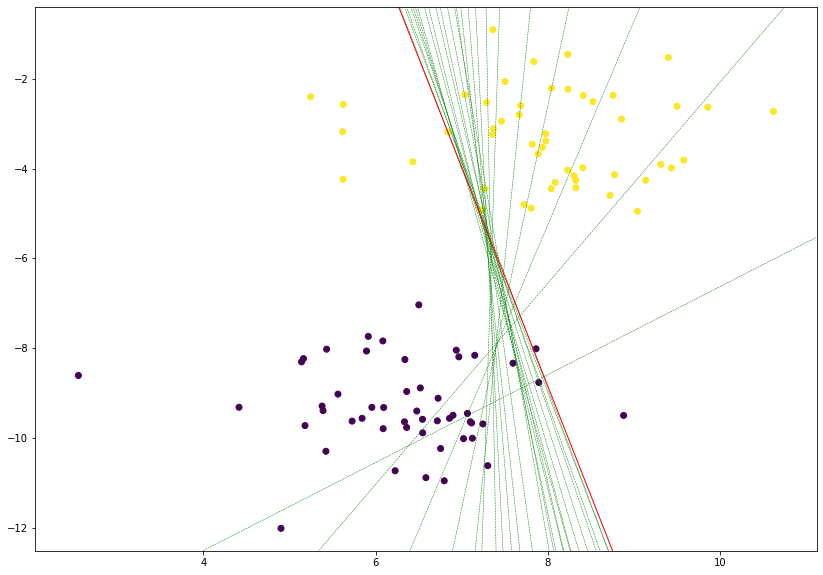

In [ ]:
from sklearn import datasets

X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=6)

lines, W, b = trainPerceptronAlgorithm(X, y, learning_rate = 0.001, num_epochs = 50)

# DB

In [ ]:
X_train = np.load('./X_train.npy')
X_test = np.load('./X_test.npy')
y_train = np.load('./y_train.npy')
y_test = np.load('./y_test.npy')

In [ ]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)
  
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

def transformation_cart2pol(array1, array2):
  cartesian_x = []
  cartesian_y = []
  for i, j, in zip(array1, array2):
    x, y = cart2pol(i, j)
    cartesian_x.append(x)
    cartesian_y.append(y)
  return cartesian_x, cartesian_y

Text(0.5, 1.0, 'Dados treino')

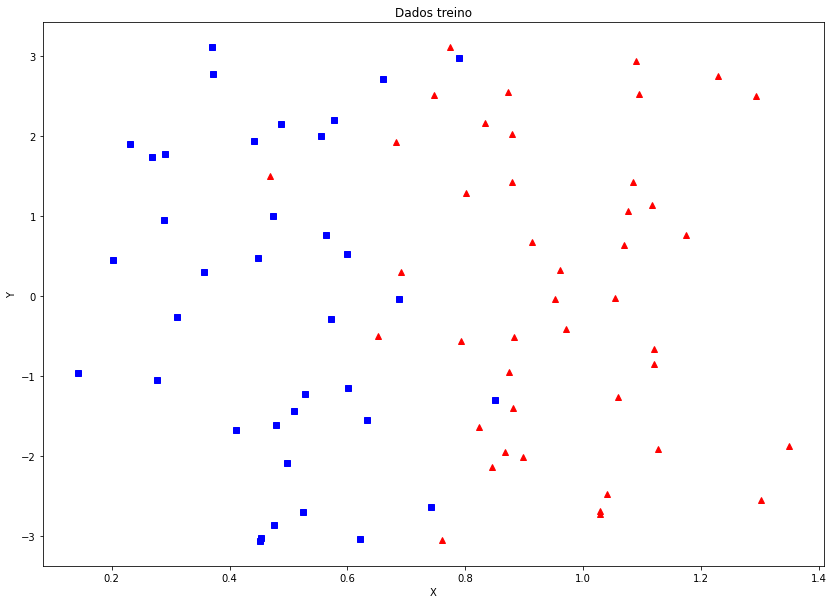

In [ ]:
plt.figure(figsize=(14, 10))
x1, y1 = transformation_cart2pol(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0])
x2, y2 = transformation_cart2pol(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1])
plt.plot(x1, y1, 'r^')
plt.plot(x2, y2, 'bs')
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Dados treino')

In [ ]:
X_train[:, 0][y_train == 0] = x1
X_train[:, 1][y_train == 0] = y1
X_train[:, 0][y_train == 1] = x2
X_train[:, 1][y_train == 1] = y2

Text(0.5, 1.0, 'Dados treino')

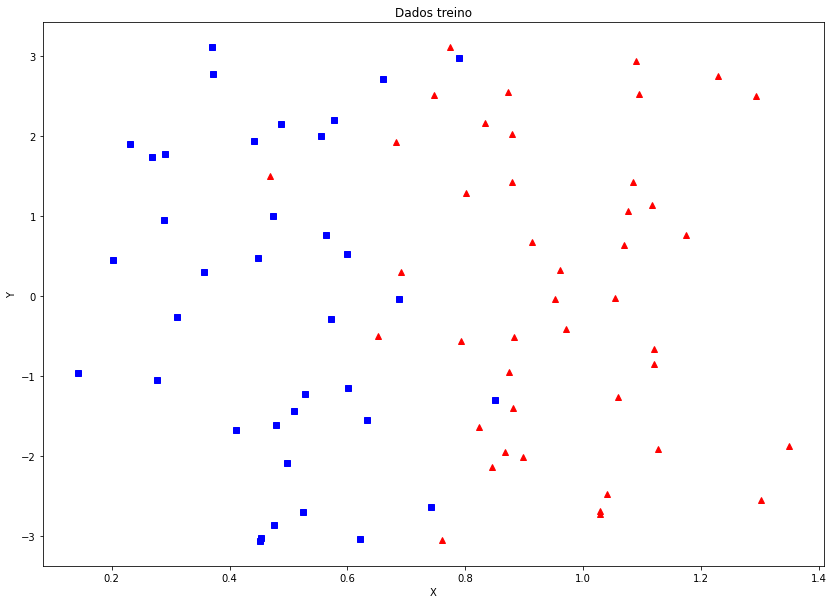

In [ ]:
plt.figure(figsize=(14, 10))
plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'r^')
plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'bs')
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Dados treino')

Text(0.5, 1.0, 'Dados teste')

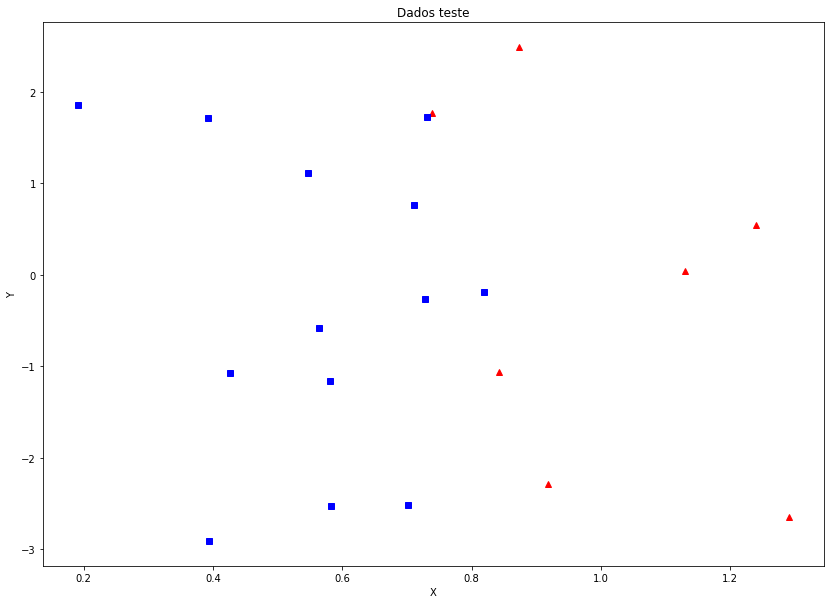

In [ ]:
plt.figure(figsize=(14, 10))
x3, y3 = transformation_cart2pol(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0])
x4, y4 = transformation_cart2pol(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1])

X_test[:, 0][y_test == 0] = x3
X_test[:, 1][y_test == 0] = y3
X_test[:, 0][y_test == 1] = x4
X_test[:, 1][y_test == 1] = y4

plt.plot(x3, y3, 'r^')
plt.plot(x4, y4, 'bs')
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Dados teste')

100%|██████████| 75/75 [00:00<00:00, 1158.61it/s]


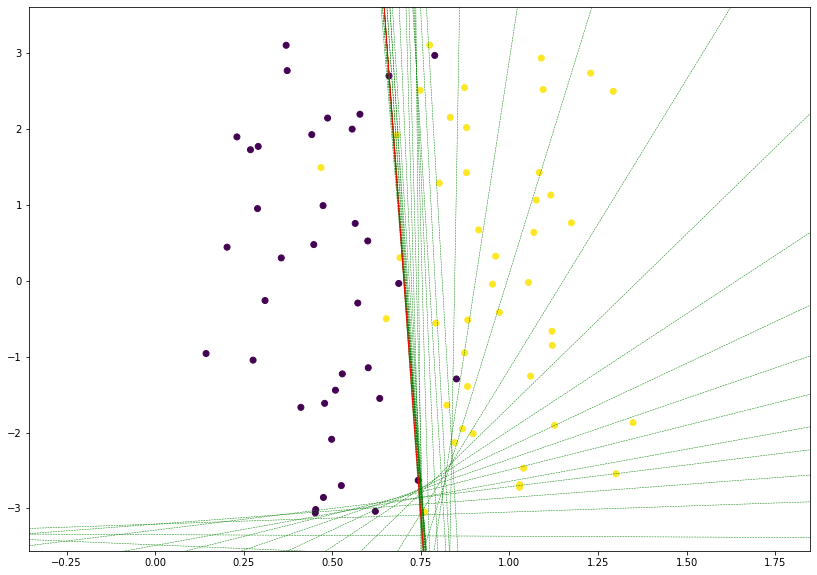

In [ ]:
lines, W, b = trainPerceptronAlgorithm(X_train, y_train, learning_rate = 0.0012, num_epochs = 75)

In [ ]:
predictions = []
for X_test_item in X_test:
  predictions.append(prediction(X_test_item, W, b))

In [ ]:
predictions

[0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0]

In [ ]:
y_test_list = y_test.tolist()
y_test_list

[0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]

In [ ]:
def accuracy(predictions, y_test):
  y_test_list = y_test.tolist()
  acc = 0
  for index in range(len(predictions)):
    if predictions[index] == y_test_list[index]:
      acc += 1

  print(f'Accuracy: {acc/len(predictions)}')

In [ ]:
accuracy(predictions, y_test)

Accuracy: 0.8


# DB1

In [ ]:
X_train = np.load('./X_train_db1.npy')
X_test = np.load('./X_test_db1.npy')
y_train = np.load('./y_train_db1.npy')
y_test = np.load('./y_test_db1.npy')

In [ ]:
a = X_train[:, 0]
b = X_train[:, 1]
c = X_train[:, 2]

res = list(zip(a,b,c))
flattened_list = []

for x in res:
    for y in x:
        flattened_list.append(y)

X_train_fixed = [flattened_list[i:i+3] for i in range(0, len(flattened_list), 3)]
X_train_fixed = np.array(X_train_fixed)

In [ ]:
a = X_test[:, 0]
b = X_test[:, 1]
c = X_test[:, 2]

res = list(zip(a,b,c))
flattened_list = []

for x in res:
    for y in x:
        flattened_list.append(y)

X_test_fixed = [flattened_list[i:i+3] for i in range(0, len(flattened_list), 3)]
X_test_fixed = np.array(X_test_fixed)

Text(0.5, 1.0, 'Dados treino')

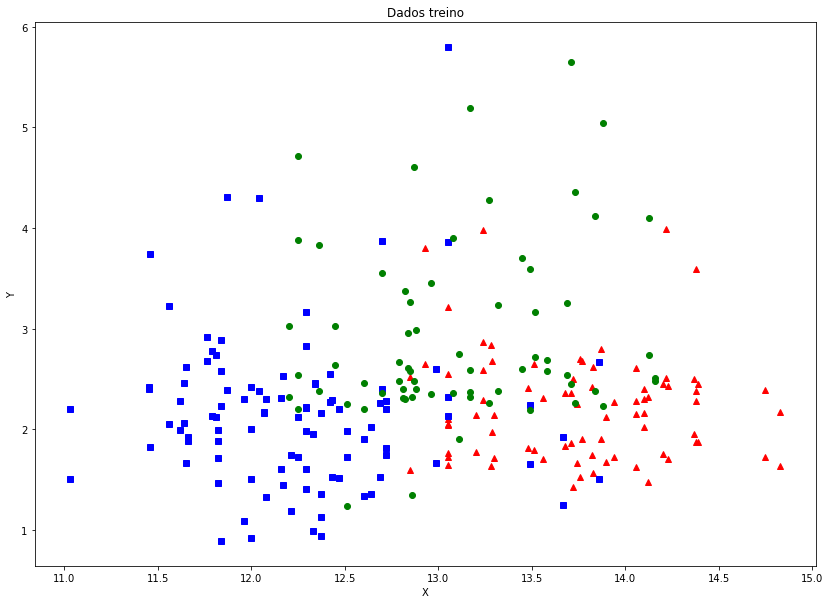

In [ ]:
plt.figure(figsize=(14, 10))
plt.plot(X_train_fixed[:, 0][y_train == 0], X_train_fixed[:, 1][y_train == 0], 'r^')
plt.plot(X_train_fixed[:, 0][y_train == 1], X_train_fixed[:, 1][y_train == 1], 'bs')
plt.plot(X_train_fixed[:, 0][y_train == 2], X_train_fixed[:, 1][y_train == 2], 'go')
plt.plot(X_train_fixed[:, 0][y_train == 0], X_train_fixed[:, 2][y_train == 0], 'r^')
plt.plot(X_train_fixed[:, 0][y_train == 1], X_train_fixed[:, 2][y_train == 1], 'bs')
plt.plot(X_train_fixed[:, 0][y_train == 2], X_train_fixed[:, 2][y_train == 2], 'go')
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Dados treino')

Text(0.5, 1.0, 'Dados teste')

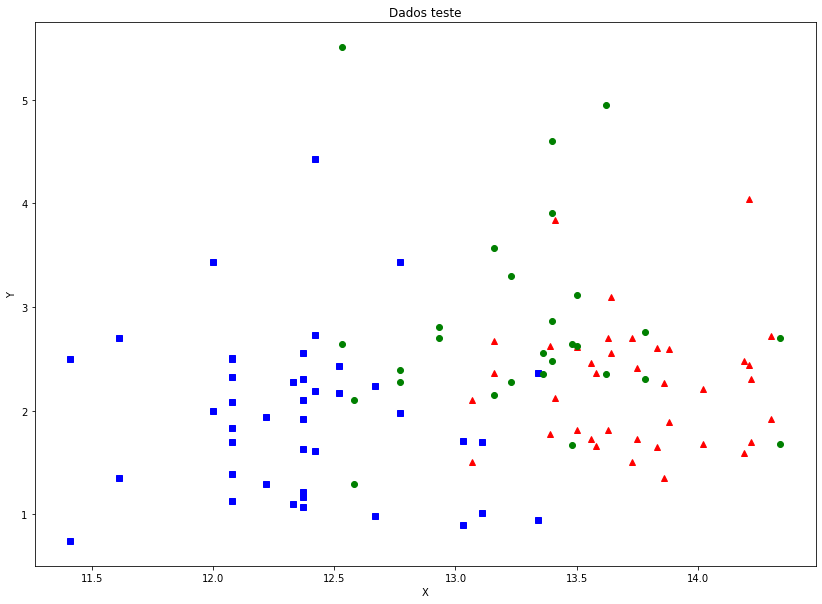

In [ ]:
plt.figure(figsize=(14, 10))
plt.plot(X_test_fixed[:, 0][y_test == 0], X_test_fixed[:, 1][y_test == 0], 'r^')
plt.plot(X_test_fixed[:, 0][y_test == 1], X_test_fixed[:, 1][y_test == 1], 'bs')
plt.plot(X_test_fixed[:, 0][y_test == 2], X_test_fixed[:, 1][y_test == 2], 'go')
plt.plot(X_test_fixed[:, 0][y_test == 0], X_test_fixed[:, 2][y_test == 0], 'r^')
plt.plot(X_test_fixed[:, 0][y_test == 1], X_test_fixed[:, 2][y_test == 1], 'bs')
plt.plot(X_test_fixed[:, 0][y_test == 2], X_test_fixed[:, 2][y_test == 2], 'go')
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Dados teste')

## 1.

### 0 vs Resto

In [ ]:
y_train_zero = y_train.copy()
y_test_zero = y_test.copy()

TEMP = 9

y_train_zero[y_train_zero == 0] = TEMP
y_test_zero[y_test_zero == 0] = TEMP

y_train_zero[y_train_zero == 2] = 0
y_test_zero[y_test_zero == 2] = 0

y_train_zero[y_train_zero == 1] = 0
y_test_zero[y_test_zero == 1] = 0

y_train_zero[y_train_zero == TEMP] = 1
y_test_zero[y_test_zero == TEMP] = 1

y_test_zero

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int32)

100%|██████████| 100/100 [00:00<00:00, 391.97it/s]


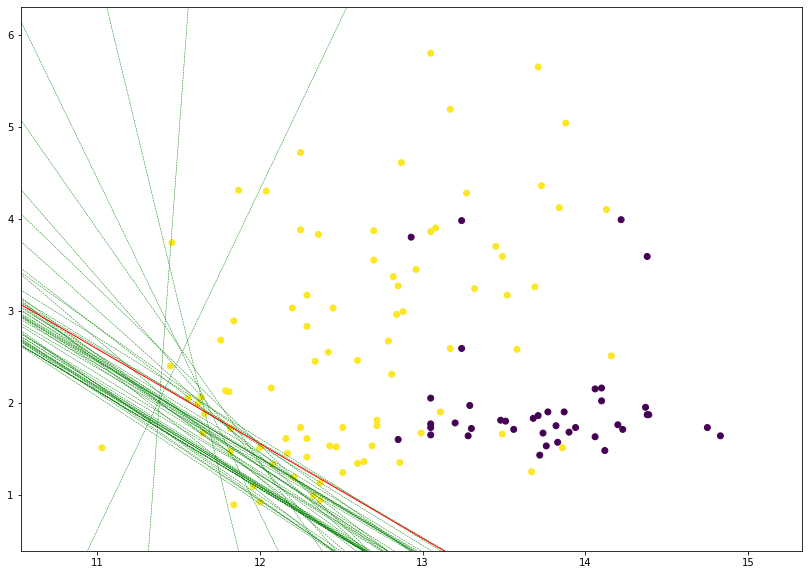

In [ ]:
lines_zero, W, b = trainPerceptronAlgorithm(X_train_fixed, y_train_zero, 3, learning_rate = 0.0045, num_epochs = 100)

In [ ]:
predictions_zero = []
for X_test_item in X_test_fixed:
  predictions_zero.append(prediction(X_test_item, W, b))

accuracy(predictions_zero, y_test_zero)

Accuracy: 0.37037037037037035


### 1 vs Resto

In [ ]:
y_train_one = y_train.copy()
y_test_one = y_test.copy()

y_train_one[y_train_one == 2] = 0
y_test_one[y_test_one == 2] = 0

y_train_one

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int32)

100%|██████████| 75/75 [00:00<00:00, 674.02it/s]


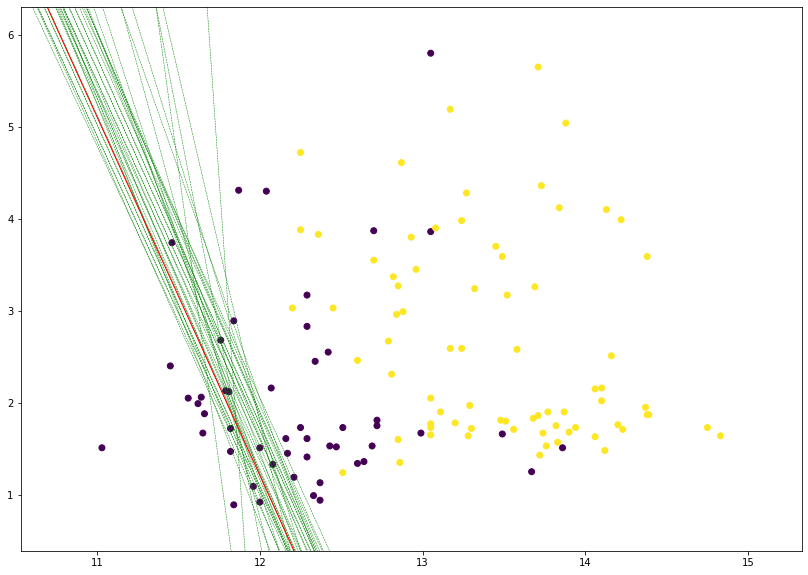

In [ ]:
lines_one, W, b = trainPerceptronAlgorithm(X_train_fixed, y_train_one, 3, learning_rate = 0.0025, num_epochs = 75)

In [ ]:
predictions_one = []
for X_test_item in X_test_fixed:
  predictions_one.append(prediction(X_test_item, W, b))

accuracy(predictions_one, y_test_one)

Accuracy: 0.8703703703703703


### 2 vs Resto

In [ ]:
y_train_two = y_train.copy()
y_test_two = y_test.copy()

y_train_two[y_train_two == 1] = 0
y_test_two[y_test_two == 1] = 0

y_train_two[y_train_two == 2] = 1
y_test_two[y_test_two == 2] = 1

y_test_two

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int32)

In [ ]:
y_test

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2], dtype=int32)

100%|██████████| 55/55 [00:00<00:00, 606.80it/s]


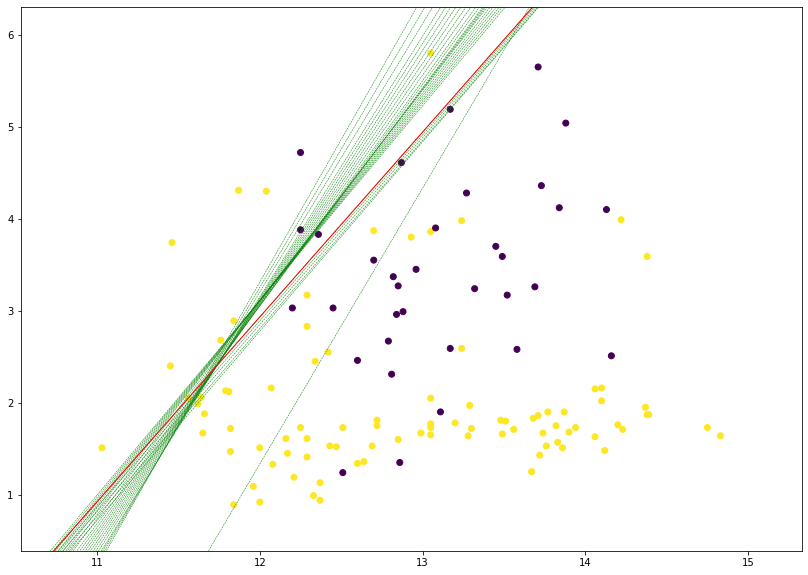

In [ ]:
lines_two, W, b = trainPerceptronAlgorithm(X_train_fixed, y_train_two, 3, learning_rate = 0.0015, num_epochs = 55)

### Resultado final

In [ ]:
predictions_two = []
for X_test_item in X_test_fixed:
  predictions_two.append(prediction(X_test_item, W, b))

accuracy(predictions_two, y_test_two)

Accuracy: 0.7037037037037037


In [ ]:
print(y_test_zero.tolist())
print(y_test_one.tolist())
print(y_test_two.tolist())

[1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0]
[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]


In [ ]:
print(predictions_zero)
print(predictions_one)
print(predictions_two)

[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [ ]:
print(y_test.tolist())

[0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2]


In [ ]:
acc = 0
for index in range(len(predictions_zero)):
  # Se for 0
  if predictions_zero[index] == 1 and predictions_one[index] == 0 and predictions_two[index] == 0:
    if y_test[index] == 0:
      acc += 1
  # Se for 1
  elif predictions_zero[index] == 0 and predictions_one[index] == 1 and predictions_two[index] == 0:
    if y_test[index] == 1:
      acc += 1
  # Se for 2
  elif predictions_zero[index] == 0 and predictions_one[index] == 0 and predictions_two[index] == 1:
    if y_test[index] == 2:
      acc += 1

print(f'Accuracy: {acc/len(predictions_zero)}')

Accuracy: 0.07407407407407407


## 2.

In [ ]:
dfmax, dfmin = X_train_fixed.max(), X_train_fixed.min()
X_train_normalized = (X_train_fixed - dfmin)/(dfmax - dfmin)

dfmax, dfmin = X_test_fixed.max(), X_test_fixed.min()
X_test_normalized = (X_test_fixed - dfmin)/(dfmax - dfmin)

Text(0.5, 1.0, 'Dados treino')

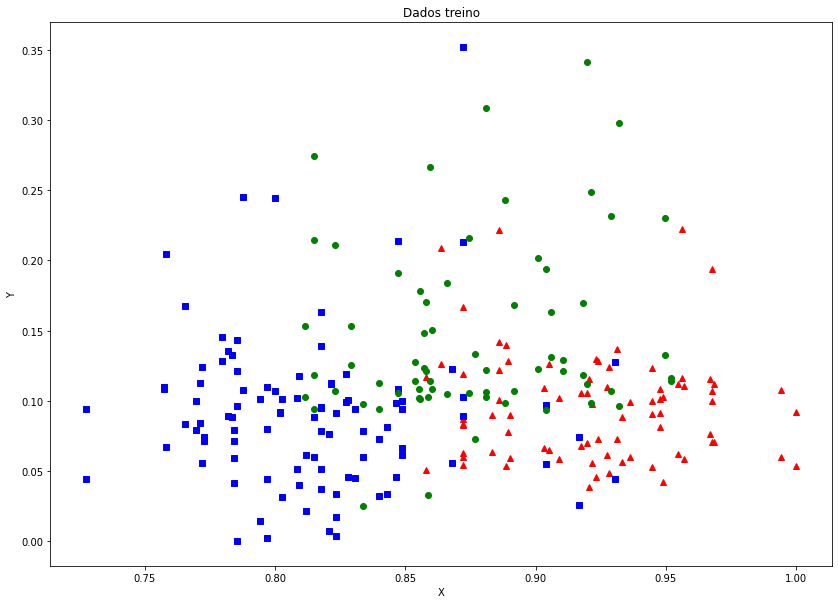

In [ ]:
plt.figure(figsize=(14, 10))
plt.plot(X_train_normalized[:, 0][y_train == 0], X_train_normalized[:, 1][y_train == 0], 'r^')
plt.plot(X_train_normalized[:, 0][y_train == 1], X_train_normalized[:, 1][y_train == 1], 'bs')
plt.plot(X_train_normalized[:, 0][y_train == 2], X_train_normalized[:, 1][y_train == 2], 'go')
plt.plot(X_train_normalized[:, 0][y_train == 0], X_train_normalized[:, 2][y_train == 0], 'r^')
plt.plot(X_train_normalized[:, 0][y_train == 1], X_train_normalized[:, 2][y_train == 1], 'bs')
plt.plot(X_train_normalized[:, 0][y_train == 2], X_train_normalized[:, 2][y_train == 2], 'go')
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Dados treino')

### 0 vs Resto

100%|██████████| 100/100 [00:00<00:00, 272.62it/s]


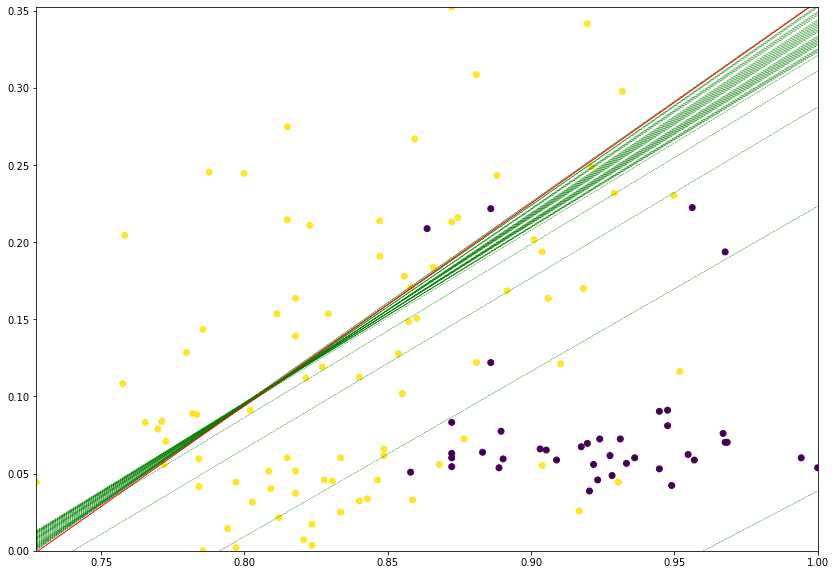

In [ ]:
lines_zero, W, b = trainPerceptronAlgorithm(X_train_normalized, y_train_zero, 3, learning_rate = 0.00055, num_epochs = 100, scale = 0)

In [ ]:
predictions_zero = []
for X_test_item in X_test_normalized:
  predictions_zero.append(prediction(X_test_item, W, b))

accuracy(predictions_zero, y_test_zero)

Accuracy: 0.5555555555555556


### 1 vs Resto

100%|██████████| 100/100 [00:00<00:00, 201.82it/s]


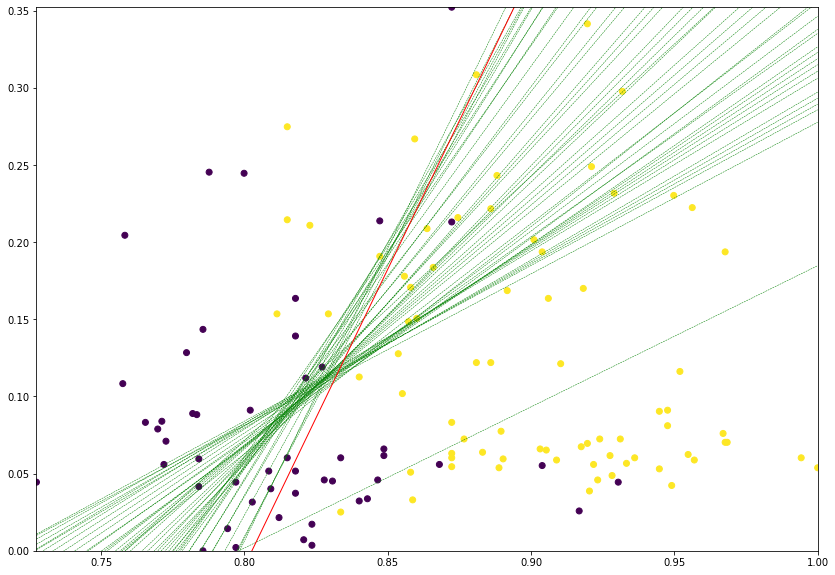

In [ ]:
lines_zero, W, b = trainPerceptronAlgorithm(X_train_normalized, y_train_one, 3, learning_rate = 0.0015, num_epochs = 100, scale = 0)

In [ ]:
predictions_one = []
for X_test_item in X_test_normalized:
  predictions_one.append(prediction(X_test_item, W, b))

accuracy(predictions_one, y_test_one)

Accuracy: 0.6666666666666666


### 2 vs Resto

100%|██████████| 100/100 [00:00<00:00, 605.24it/s]


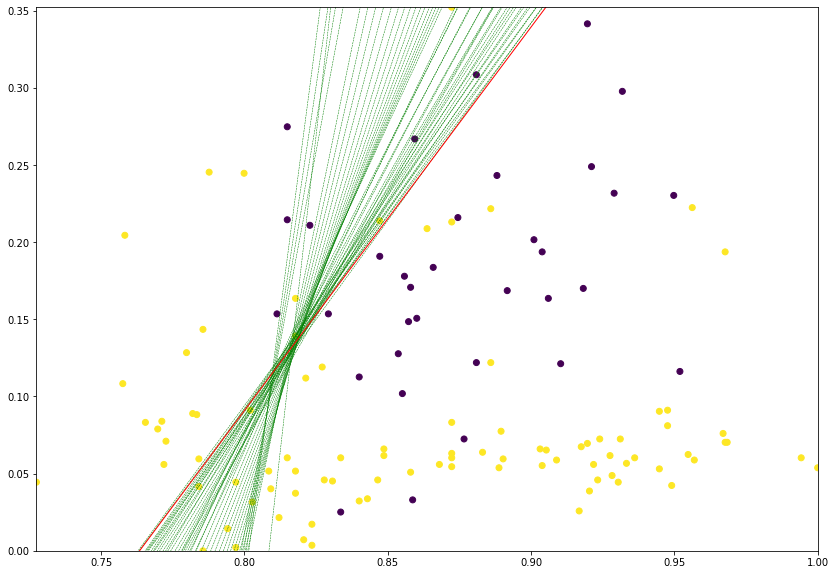

In [ ]:
lines_zero, W, b = trainPerceptronAlgorithm(X_train_normalized, y_train_two, 3, learning_rate = 0.0015, num_epochs = 100, scale = 0)

In [ ]:
predictions_two = []
for X_test_item in X_test_normalized:
  predictions_two.append(prediction(X_test_item, W, b))

accuracy(predictions_two, y_test_two)

Accuracy: 0.6851851851851852


### Resultado final

In [ ]:
print(y_test_zero.tolist())
print(y_test_one.tolist())
print(y_test_two.tolist())

[1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0]
[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]


In [ ]:
print(predictions_zero)
print(predictions_one)
print(predictions_two)

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [ ]:
print(y_test.tolist())

[0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2]


In [ ]:
acc = 0
for index in range(len(predictions_zero)):
  # Se for 0
  if predictions_zero[index] == 1 and predictions_one[index] == 0 and predictions_two[index] == 0:
    if y_test[index] == 0:
      acc += 1
  # Se for 1
  elif predictions_zero[index] == 0 and predictions_one[index] == 1 and predictions_two[index] == 0:
    if y_test[index] == 1:
      acc += 1
  # Se for 2
  elif predictions_zero[index] == 0 and predictions_one[index] == 0 and predictions_two[index] == 1:
    if y_test[index] == 2:
      acc += 1

print(f'Accuracy: {acc/len(predictions_zero)}')

Accuracy: 0.0
